# Education Project
This goal of this project is to find the socioeconomic factors that predict average ACT score.
Is school performance, measured by ACT score, predicted by socioeconomic factors?

Data for this project:
The EdGap dataset can be accessed at EdGap.org. This dataset from 2016-2017 includes average ACT score and a number of socioeconomic factors by school.
The school information dataset can be accessed from the National Center for Education Statistics at https://nces.ed.gov/ccd/pubschuniv.asp.
The homeless dataset can be downloaded from https://eddataexpress.ed.gov/download. I used data from the 2016-2017 school year.

#### Import libraries and set the plotting style.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#### Load the data

Load the EdGap data set.

In [3]:
edgap = pd.read_excel(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\education\data\EdGap_data.xlsx", 
                   dtype = {'NCESSCH School ID': object})


C:\Users\jenpo\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


I'm not sure what that error is but will check below that the data loaded.

Load the school information.

In [4]:
school_information = pd.read_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\education\data\ccd_sch_029_1617_w_1a_11212017.csv",
                                 encoding = "unicode_escape")


C:\Users\jenpo\AppData\Local\Temp\ipykernel_8584\2164268830.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\education\data\ccd_sch_029_1617_w_1a_11212017.csv",


This error appears to be about data types. Again, I will check below that the data loaded.

Load the homeless data.

In [6]:
homeless_data = pd.read_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\education\data\homeless.csv")
homeless_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423 entries, 0 to 8422
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   School Year       8423 non-null   object 
 1   State             8423 non-null   object 
 2   NCES LEA ID       8423 non-null   int64  
 3   LEA               8423 non-null   object 
 4   School            0 non-null      float64
 5   NCES SCH ID       0 non-null      float64
 6   Data Group        8423 non-null   int64  
 7   Data Description  8423 non-null   object 
 8   Value             8423 non-null   int64  
 9   Denominator       0 non-null      float64
 10  Numerator         0 non-null      float64
 11  Population        8423 non-null   object 
 12  Subgroup          8423 non-null   object 
 13  Characteristics   0 non-null      float64
 14  Age/Grade         0 non-null      float64
 15  Academic Subject  0 non-null      float64
 16  Program Type      0 non-null      float64


In [ ]:
The data appears to have loaded correctly.

## Explore the Data


In [7]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

The EdGap data appears to have loaded correctly, and the data looks reasonable.

In [8]:
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No         

The school data appears to have loaded.

In [9]:
pd.set_option('display.max_columns', None)
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No         

In [10]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


There are some null values, but not in the school ID column, ACT column, or free and reduced lunch column.

Check the school dataset info.

In [11]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

There are significantly more rows in the school dataset than in the edgap dataset.
Both datasets are in tidy format.
Many of the data types look correct, but the school identifier is an object in the EdGap dataset and a float in the school dataset.

Examine the first five rows of the homeless dataset.

In [12]:
homeless_data.head()

School Year    State  NCES LEA ID               LEA  School  NCES SCH ID  \
0   2016-2017  ALABAMA       100005  Albertville City     NaN          NaN   
1   2016-2017  ALABAMA       100006   Marshall County     NaN          NaN   
2   2016-2017  ALABAMA       100007       Hoover City     NaN          NaN   
3   2016-2017  ALABAMA       100008      Madison City     NaN          NaN   
4   2016-2017  ALABAMA       100011        Leeds City     NaN          NaN   

   Data Group           Data Description  Value  Denominator  Numerator  \
0         814  Chronic absenteeism table     21          NaN        NaN   
1         814  Chronic absenteeism table     83          NaN        NaN   
2         814  Chronic absenteeism table     28          NaN        NaN   
3         814  Chronic absenteeism table     23          NaN        NaN   
4         814  Chronic absenteeism table     29          NaN        NaN   

                    Population  Subgroup  Characteristics  Age/Grade  \
0  Chronically Absent Students  Homeless              NaN        NaN   
1  Chronically Absent Students  Homeless              NaN        NaN   
2  Chronically Absent Students  Homeless              NaN        NaN   
3  Chronically Absent Students  Homeless              NaN        NaN   
4  Chronically Absent Students  Homeless              NaN        NaN   

   Academic Subject  Program Type  Outcome  
0               NaN           NaN      NaN  
1               NaN           NaN      NaN  
2               NaN           NaN      NaN  
3               NaN           NaN      NaN  
4               NaN           NaN      NaN

It appears to have loaded correctly. I don't have the NCESSCH ID, but I do have the NCES LEA ID. 
The school_information dataset also has the LEA ID, so I plan to join this dataset to the school_information dataset using the LEA ID.

Next check the homeless_data info.

In [13]:
homeless_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423 entries, 0 to 8422
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   School Year       8423 non-null   object 
 1   State             8423 non-null   object 
 2   NCES LEA ID       8423 non-null   int64  
 3   LEA               8423 non-null   object 
 4   School            0 non-null      float64
 5   NCES SCH ID       0 non-null      float64
 6   Data Group        8423 non-null   int64  
 7   Data Description  8423 non-null   object 
 8   Value             8423 non-null   int64  
 9   Denominator       0 non-null      float64
 10  Numerator         0 non-null      float64
 11  Population        8423 non-null   object 
 12  Subgroup          8423 non-null   object 
 13  Characteristics   0 non-null      float64
 14  Age/Grade         0 non-null      float64
 15  Academic Subject  0 non-null      float64
 16  Program Type      0 non-null      float64


It looks like there are no null values in the Value column, which is the number of homeless students at the school.
There also aren't any null values in the NCES LEA ID column, which is the column I plan to use to join this data.

#### Do we have sufficient data for this project?
We want to explore the data enough to confirm that there is sufficient data.
Make a pair plot to examine the relationships between the variables: Remove the school ID and show just the ACT score and socioeconomic variables.

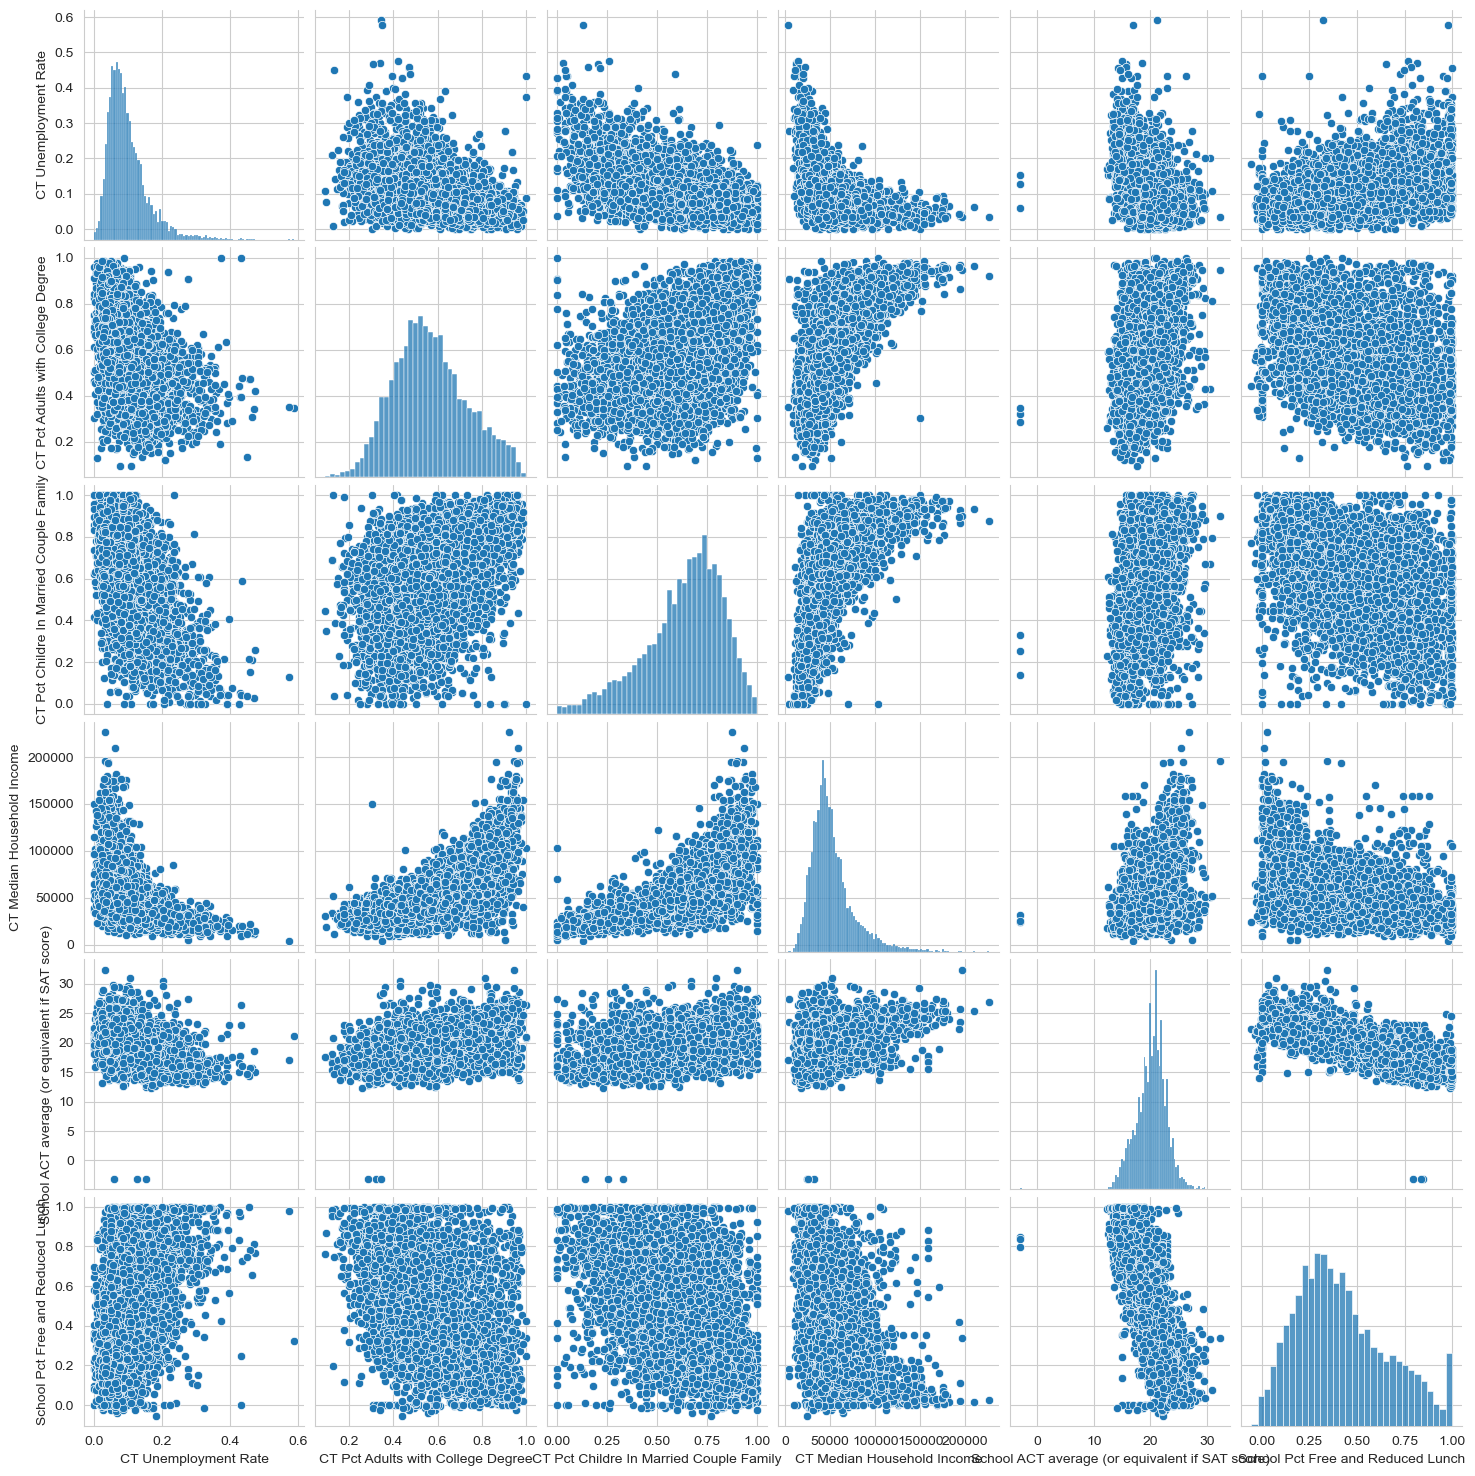

In [14]:
sns.pairplot(edgap.drop(columns = 'NCESSCH School ID'));

plt.show()

It appears that there is a relationship between the socioeconomic values and the ACT score. There are also some problems with the data, such as some negative ACT scores.

Modify the pair plot to more clearly illustrate relationships: Add regression lines and format the pair plot.

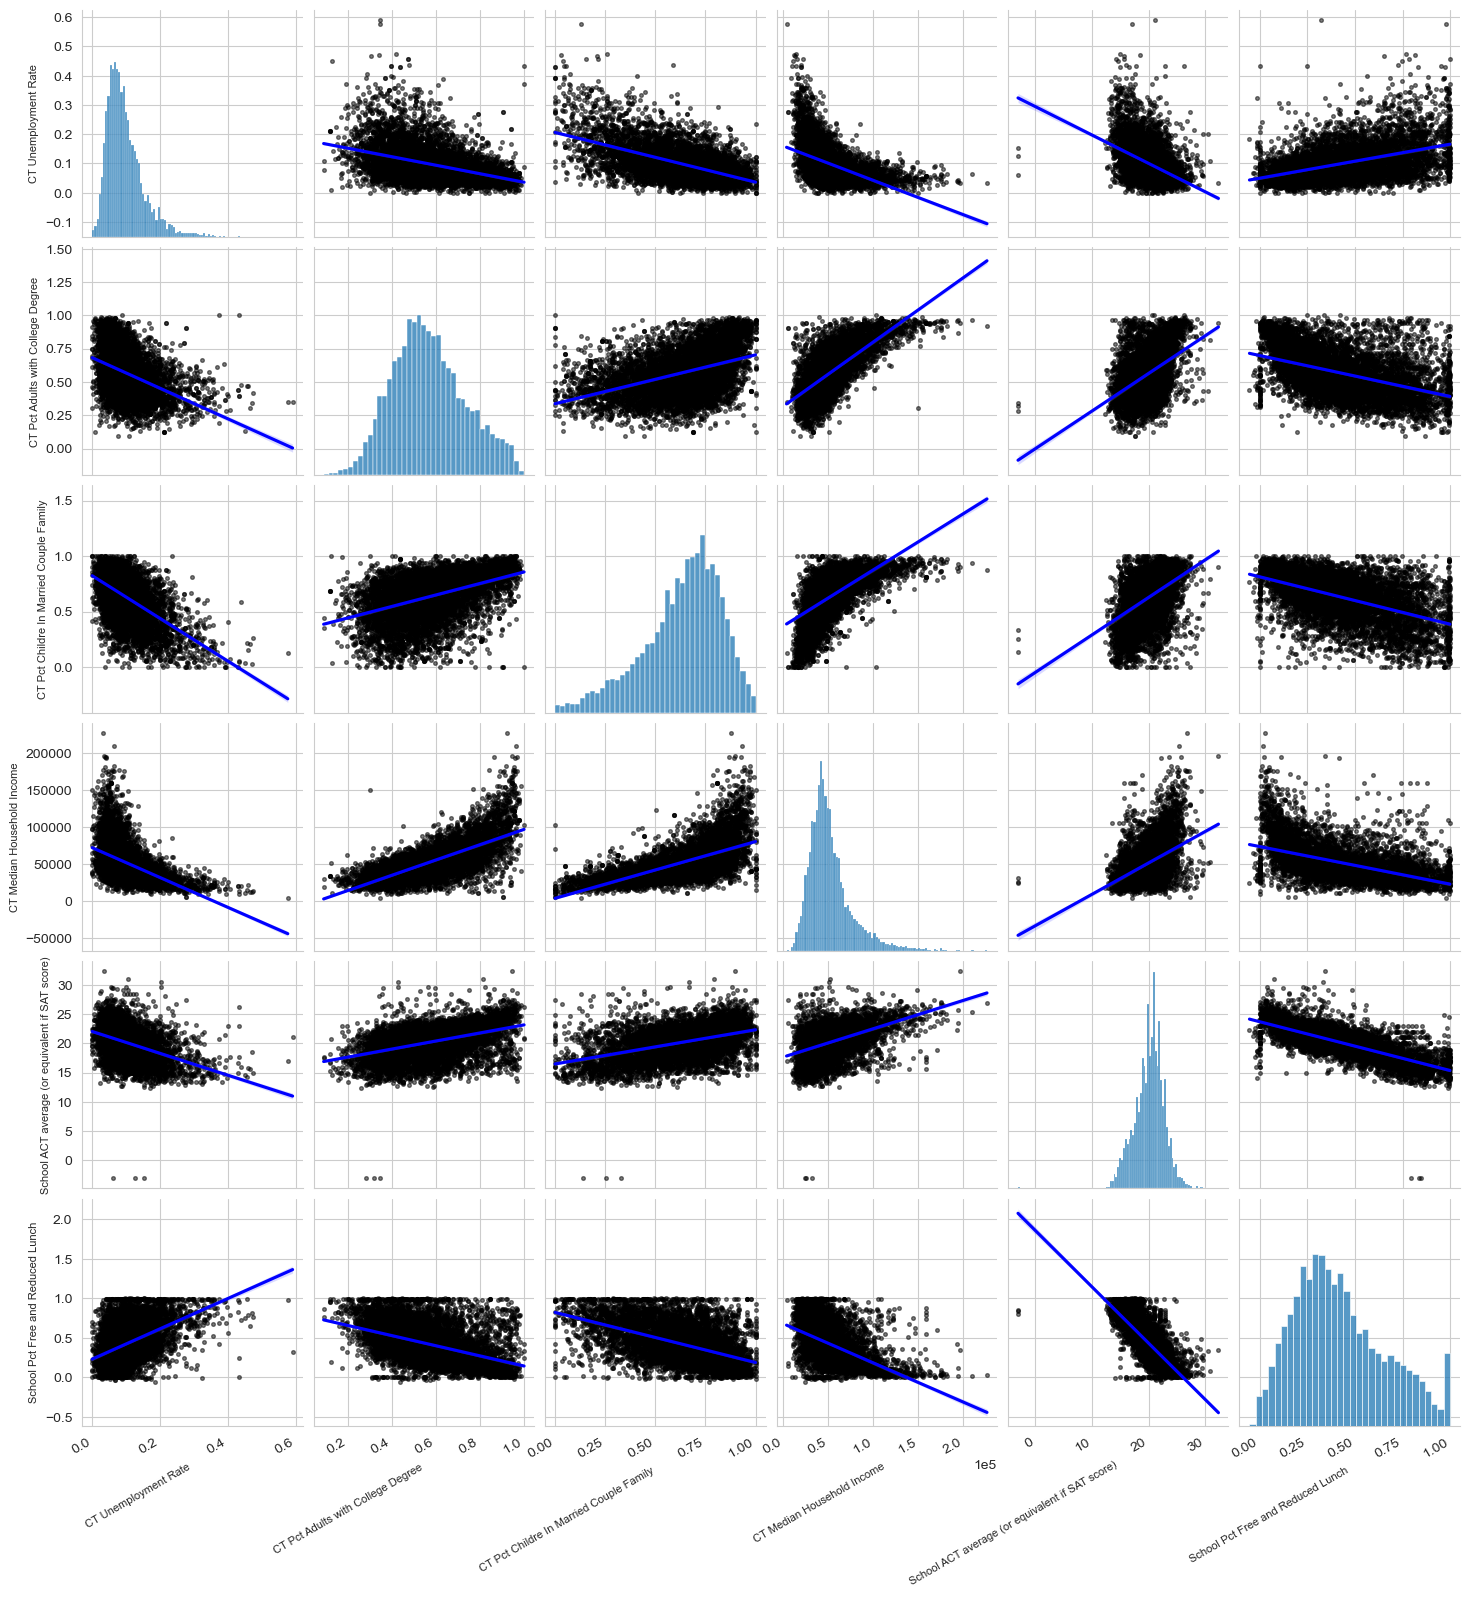

In [14]:
fig = sns.pairplot(
    edgap.drop(columns = 'NCESSCH School ID'),
    kind = 'reg',   # kind is reg, for regression
    plot_kws = {
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s":7}
    },
);

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0, 0)) # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')  # x-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)   # y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

It does look like there are relatioships between variables.
Focus on one row in the pair plot because we are interested in the ACT score as the response variable and the other variables as predictors.

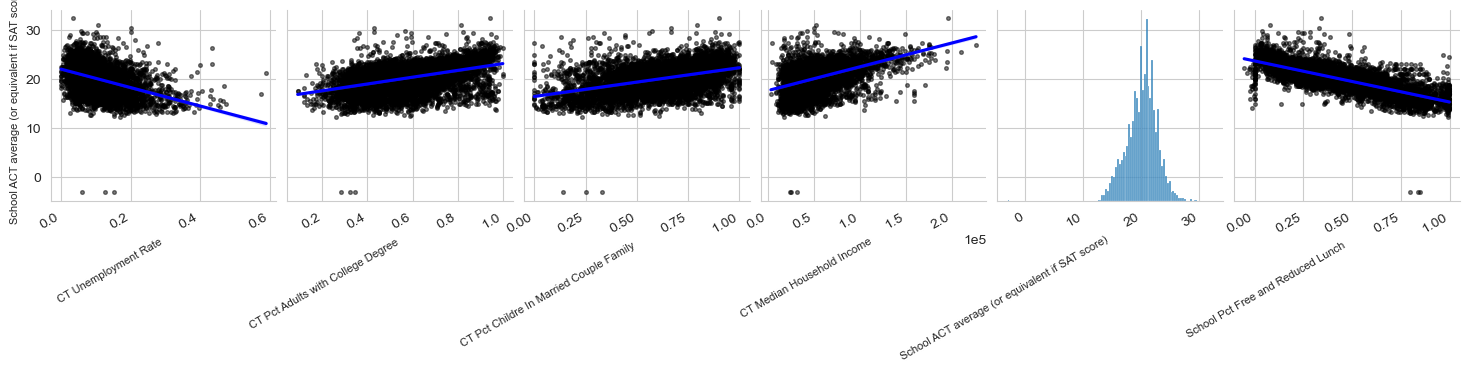

In [15]:
fig = sns.pairplot(
    edgap.drop(columns = 'NCESSCH School ID'),
    y_vars = ['School ACT average (or equivalent if SAT score)'],
    kind = 'reg',   # kind is reg, for regression
    plot_kws = {
        "line_kws": {"color": "blue"},
        "scatter_kws": {"alpha": 0.5, "color": "k", "s":7}
    },
);

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0, 0)) # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 30, ha = 'right')  # x-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize = 8)   # y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation = 30, ha = 'right')

plt.show()

There does look to be relationships between the predictor variables and the ACT scores.
There are some out-of-range values that need to be dealt with.
It looks like it will be worth the time to prepare the data for analysis.

## Data Preparation
#### Select relevant subsets of the data.
We will keep only the year, school ID, location, school type, and LEA ID (for joining with the homeless_data) information from the school dataset.

In [15]:
school_information = school_information[['SCHOOL_YEAR', 'LEAID', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']]
school_information.head()

SCHOOL_YEAR   LEAID       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  100002  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  100002  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  100002  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  100002  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  100002  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

The relevant columns are present.


We will keep only the NCES LEA ID and Value columns from the homeless dataset.

In [16]:
homeless_data = homeless_data[['NCES LEA ID', 'Value']]
homeless_data.head()

NCES LEA ID  Value
0       100005     21
1       100006     83
2       100007     28
3       100008     23
4       100011     29

#### Rename Columns
Rename the columns in all three datasets with simple, informative names in snake case.

In [17]:
edgap = edgap.rename(
    columns = {'NCESSCH School ID': 'id',
               'CT Pct Adults with College Degree': 'percent_college',
               'CT Unemployment Rate': 'rate_unemployment',
               'CT Pct Childre In Married Couple Family': 'percent_married',
               'CT Median Household Income': 'median_income',
               'School ACT average (or equivalent if SAT score)': 'average_act',
               'School Pct Free and Reduced Lunch': 'percent_lunch',
              }
)
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [18]:
school_information = school_information.rename(
    columns = {'SCHOOL_YEAR': 'year',
               'LEAID': 'lea_id',
               'NCESSCH': 'id',
               'LSTATE': 'state',
               'LZIP': 'zip',
               'SCH_TYPE_TEXT': 'school_type',
               'LEVEL': 'school_level',
               'CHARTER_TEXT': 'charter',
              }
)

school_information.head()

year  lea_id            id state    zip         school_type  \
0  2016-2017  100002  1.000020e+10    AL  35220  Alternative School   
1  2016-2017  100002  1.000020e+10    AL  36067  Alternative School   
2  2016-2017  100002  1.000020e+10    AL  36784  Alternative School   
3  2016-2017  100002  1.000020e+10    AL  36057  Alternative School   
4  2016-2017  100002  1.000020e+10    AL  35206  Alternative School   

  school_level charter  
0         High      No  
1         High      No  
2         High      No  
3         High      No  
4         High      No

In [19]:
homeless_data = homeless_data.rename(
    columns = {'NCES LEA ID': 'lea_id',
               'Value': 'homeless_count',
              }
)

homeless_data.head()

lea_id  homeless_count
0  100005              21
1  100006              83
2  100007              28
3  100008              23
4  100011              29

The datasets have the columns needed for the analysis, and the column titles are appropriate.

#### Join the Datasets



We will join the EdGap and school datasets on the id column. 
Change the id column to object type in the school_information dataset so that the data type is the same in both datasets. Then confirm that the change has been made.

In [20]:
school_information['id'] = school_information['id'].astype('object')
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   lea_id        102183 non-null  object
 2   id            102181 non-null  object
 3   state         102183 non-null  object
 4   zip           102183 non-null  object
 5   school_type   102181 non-null  object
 6   school_level  102179 non-null  object
 7   charter       102179 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


The id column type is now object.

Join the datasets and call the resulting dataset df. Use a left join because the EdGap dataset has fewer rows. We want the data from the EdGap dataset and the matching data from the school dataset. Confirm the df dataset looks correct.

In [21]:
df = edgap.merge(
    school_information,
    how = 'left',
    on = 'id'
)

df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year   lea_id state    zip  \
0        42820.0    20.433455       0.066901  2016-2017  1000016    DE  19804   
1        89320.0    19.498168       0.112412  2016-2017  1000080    DE  19709   
2        84140.0    19.554335       0.096816  2016-2017  1000080    DE  19709   
3        56500.0    17.737485       0.296960  2016-2017  1000170    DE  19958   
4        54015.0    18.245421       0.262641  2016-2017  1000180    DE  19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

The datasets appear to have been joined correctly.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   lea_id             7898 non-null   object 
 9   state              7898 non-null   object 
 10  zip                7898 non-null   object 
 11  school_type        7898 non-null   object 
 12  school_level       7898 non-null   object 
 13  charter            7898 non-null   object 
dtypes: float64(6), object(8)
memory usage: 873.6+ KB


There are the same number of id's as there were in the EdGap dataset, so it appears that we have merged the rows in the school dataset that correspond to the rows in the EdGap dataset correctly.

Now we will join the homeless dataset to the combined dataframe.
Because the homeless data is at the school district level, we will do a left join.
The new dataframe likely has schools with the same school district. We want the homeless data to be applied to each school in the school district.

First change the lea_id column in the homeless dataset to type object.

In [23]:
homeless_data['lea_id'] = homeless_data['lea_id'].astype('object')
homeless_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8423 entries, 0 to 8422
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lea_id          8423 non-null   object
 1   homeless_count  8423 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 131.7+ KB


The lea_id type has been changed to object. 
Next we will join the data.

In [24]:
df = df.merge(
    homeless_data,
    how = 'left',
    on = 'lea_id'
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   lea_id             7898 non-null   object 
 9   state              7898 non-null   object 
 10  zip                7898 non-null   object 
 11  school_type        7898 non-null   object 
 12  school_level       7898 non-null   object 
 13  charter            7898 non-null   object 
 14  homeless_count     4735 non-null   float64
dtypes: float64(7), object(8)
memory usage: 936.0+ KB


The data appears to have merged correctly. Unfortunately, it looks like the homeless data was missing values for a lot of the school districts that were in the EdGap data. The best solution may be to do the work for the other data points on this dataframe and do the work for the homeless comparisons on a smaller dataframe. We will make this smaller dataframe after we deal with the null values.

## Quality Control
There are bounds for some of the columns. ACT scores are between 1 and 36. Proportions should be between 0 and 1. We can use the describe() method to compute descriptive statistics and ensure that the minimum and maximum values in these columns are correct.

In [26]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  homeless_count  
count  7986.000000    7986.000000     4735.000000  
mean     20.181532       0.420651      408.563041  
std       2.595201       0.239754      793.612905  
min      -3.070818      -0.054545        0.000000  
25%      18.600000       0.238501        7.000000  
50%      20.400000       0.381570       39.000000  
75%      21.910867       0.575447      329.000000  
max      32.362637       0.998729     4428.000000

We can see that there are negative values for ACT score and percent_lunch, which should not be the case.

Another way to check the minimum and maximum numbers in the columns we need is to use the agg function. Here we are selecting the data types that are numerical variables and rounding to two decimal places.

In [27]:
df.select_dtypes(include = ['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  homeless_count  
min        -3.07          -0.05             0.0  
max        32.36           1.00          4428.0

Set out of range values (negative ACT scores and percentages) to null values so that we can retain the rest of the values in those rows.
Then check the minimum and maximum values again to make sure the change was implemented.

In [28]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan
df.select_dtypes(include = ['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  homeless_count  
min        12.36            0.0             0.0  
max        32.36            1.0          4428.0

There are no more negative values.

Next we will check the types, levels, and charter status of the schools.

In [29]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

It seems reasonable to include all these school types.

In [30]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

It seems reasonable to include all the charter school types at this time.

In [31]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

We will keep only the high schools, as ACT tests are taken during high school. Then check to make sure it was done.

In [32]:
df = df.loc[df['school_level'] == 'High']
df['school_level'].value_counts()

school_level
High    7230
Name: count, dtype: int64

The school types are all now high school.

Next we will check for any duplicated rows.

In [33]:
df.duplicated().sum()

np.int64(0)

There are no duplicated rows.

## Identify Missing Data
How many values of each variable are missing?

In [34]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
lea_id                                    0
state                                     0
zip                                       0
school_type                               0
school_level                              0
charter                                   0
homeless_count                         2914

There are over 7000 rows, so there doesn't seem to be a lot of values missing, except in the homeless_count section. We can express the number of missing values as a percentage to see relatively how many values are missing.

In [35]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name = 'Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
lea_id                               0.00
state                                0.00
zip                                  0.00
school_type                          0.00
school_level                         0.00
charter                              0.00
homeless_count                      40.30

The highest percentage of missing values (except for homeless_count) is 0.28%, so there is not much data missing.

Next we will examine which states we have data from.

In [36]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

That does not look like very many states. Count the number of states so we have a better idea of the data available.

In [37]:
df['state'].nunique()

20

We have data from less than half of the states. Next we will plot on a map what states we have and what the counts are for each state.

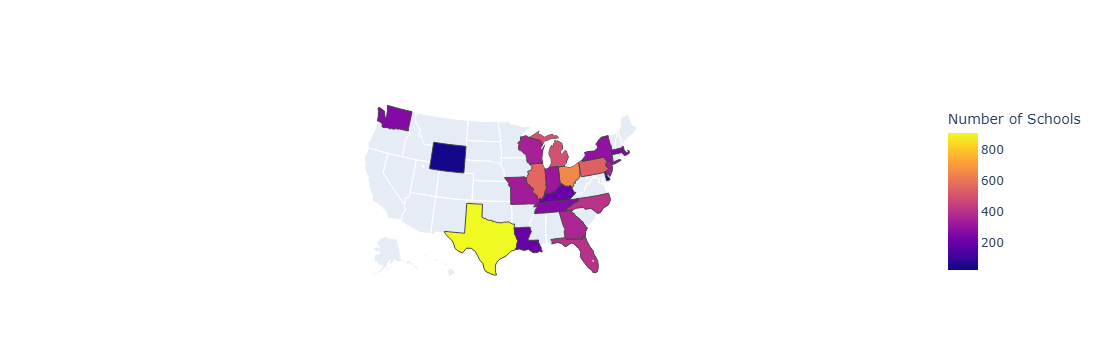

In [38]:
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(
    geo = {'scope': 'usa'}, coloraxis_colorbar = dict(title = 'Number of Schools')
)

data = dict(
    type = 'choropleth',
    locations = df['state'].value_counts().index,
    locationmode = 'USA-states',
    z = df['state'].value_counts().values,
    coloraxis = 'coloraxis',
)

x = pg.Figure(data = [data], layout = layout)

po.iplot(x)

We are missing a large amount of data due to omission. However, we will continue using the data we have.

Next we will drop the rows where the average ACT score is missing. This is the key response value that we are interested in, and there are very few rows with missing average ACT score data.

In [39]:
df = df.dropna(subset = ['average_act'])

Check to make sure that the missing values were dropped.

In [40]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
lea_id                                    0
state                                     0
zip                                       0
school_type                               0
school_level                              0
charter                                   0
homeless_count                         2914

There are now 0 missing ACT values.

### Data Imputation
Impute the values that are recorded as NaN's in the dataset. We will take the data that we have and replace the NaN's with values that we can estimate from the data. First define the predictor values that we want to use in our analysis to predict the average ACT score. (We will exclude the homeless_count data from this list. It is missing too much data, so we will deal with it later by making a separate dataframe to use when focusing on homeless data.)

In [41]:
predictor_variables = [
    'rate_unemployment', 
    'percent_college',
    'percent_married',
    'median_income', 
    'percent_lunch',
    'state',
    'charter'
]

Use an iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis. (We are using a type of regression analysis to look at relationships between those predictors so that we can use the best guess of that value based on its relationship to the other variables.)

Import the necessary tools and define an imputer. (This just creates an object of this type.)

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

Fit the imputer using the numerical predictor values we have. (Define the columns we want to use in the imputation process.)

In [43]:
numerical_predictors = df[predictor_variables].select_dtypes(include = 'number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fit the imputer with the data from those columns. (We're learning the relationships between those columns and then we can apply the transform method to actually replace the values.)

In [44]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [45]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

To check to see that we have actually replaced the NaN values, we can look for missing values in the dataframe.

In [46]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
lea_id                                    0
state                                     0
zip                                       0
school_type                               0
school_level                              0
charter                                   0
homeless_count                         2914

We no longer have any NaN values in the dataset outside of homeless_count. 
Next we will make a separate database with only the rows that have homeless data.

In [47]:
df_homeless = df[df['homeless_count'].notnull()]
df_homeless.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4313 entries, 1 to 7985
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4313 non-null   object 
 1   rate_unemployment  4313 non-null   float64
 2   percent_college    4313 non-null   float64
 3   percent_married    4313 non-null   float64
 4   median_income      4313 non-null   float64
 5   average_act        4313 non-null   float64
 6   percent_lunch      4313 non-null   float64
 7   year               4313 non-null   object 
 8   lea_id             4313 non-null   object 
 9   state              4313 non-null   object 
 10  zip                4313 non-null   object 
 11  school_type        4313 non-null   object 
 12  school_level       4313 non-null   object 
 13  charter            4313 non-null   object 
 14  homeless_count     4313 non-null   float64
dtypes: float64(7), object(8)
memory usage: 539.1+ KB


Next we will download the clean data file to the data folder in the education folder, and confirm that it was downloaded.

In [57]:
df.to_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\education\data\clean_education.csv", 
          encoding = 'utf-8-sig', 
          index = False
         )
print('saved to file')

saved to file


We will leave the homeless_count data in df unless it becomes a problem and in case we need it in that dataframe.
However, we will plan to use df_homeless when focusing on the homeless data.
Next we will download the df_homeless clean data file to the data folder in the education folder, and confirm that it was downloaded.

In [58]:
df_homeless.to_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\education\data\clean_ed_homeless.csv", 
          encoding = 'utf-8-sig', 
          index = False
         )
print('saved to file')

saved to file


## Modeling

#### Single input models
Fit and assess models predicting the average ACT score from single input variables.

#### Median income
Plot the regression line and the scatter plot.

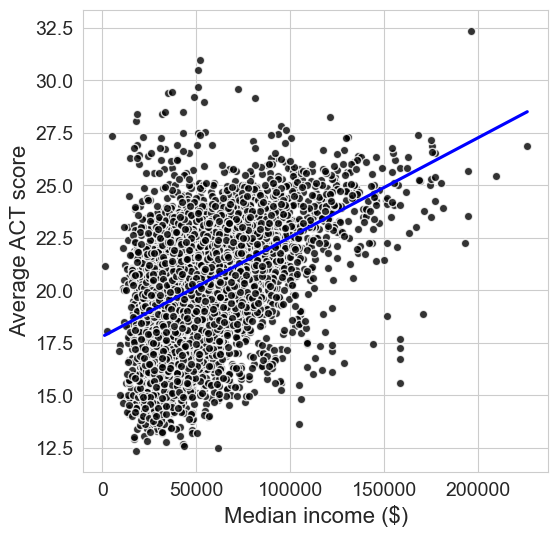

In [48]:
plt.figure(figsize = (6, 6))

sns.regplot(data = df,
            x = 'median_income',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

plt.show()

Fit the simple linear regression after importing statsmodels
(using statsmodels ordinary least squares function with the formula version)
(predictor variable: median_income, response variable: average_ACT)

In [49]:

import statsmodels.formula.api as smf
model_median_income = smf.ols(formula = 'average_act ~ median_income', data = df).fit()

Display the fit summary

In [50]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:31:19   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

The intercept in the model is 17.8.
The coefficient on median income is 4.7x10^(-5).
(It's a very small coeffieient because the median income is calculated in dollars and goes over a long range while the ACT score is over a much smaller range.)
We are particularly intestested in the statistical significance of the coefficient on our predictor.
We can see the statistical significance of the coefficient in the column for the p-values. They are small, and are in fact 0 up to 3 decimal places, so we have stistically significant coefficients.
We can see some information on the performance of the model. The R-squared value is 0.211, which is a relatively low R-squared.

Numerical assessment of fit accuracy

Compute the R-squared (for practice, since it was also in the fit summary above).

In [51]:
model_median_income.rsquared

np.float64(0.21118648979300858)

Compute the root mean square error (RMSE)
We're computing the predictions of the model for the values of median income that were in the dataset where we fit the model, using NumPy to get the square root of the mean squared error, which is calculated using a metric from scikit-learn.

In [52]:
y_hat = model_median_income.predict()

In [53]:
import sklearn
from sklearn.metrics import mean_squared_error

In [54]:

np.sqrt(mean_squared_error(df['average_act'],y_hat)).round(3)

np.float64(2.228)

This is often not as easy to interpret as the mean absolute error, so we'll also compute the mean absolute error.

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688601

The mean absolute error tells us directly, on average, what the error was between the regression model and the actual values for the response variable (ACT score in this case).

Although the model was not perfect, 1.1729 is a relatively small error in terms of the range of possible values for an ACT score. It's saying that we are able to in some way predict the ACT score from this input variable (median income).

Use a residual plot for graphical assessment of model fit

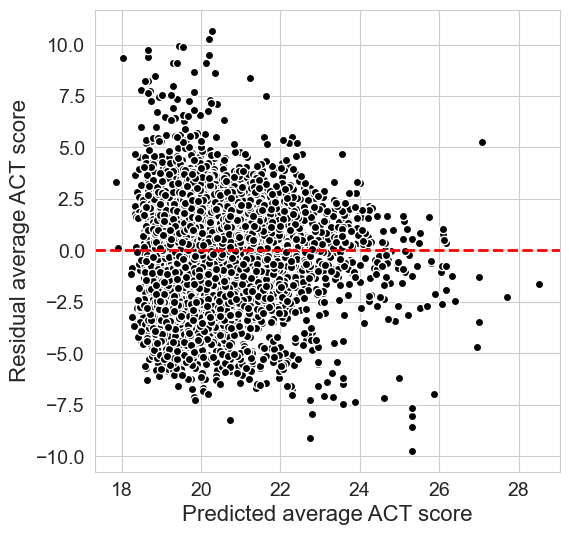

In [57]:
plt.figure(figsize = (6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

plt.xlabel('Predicted average ACT score', fontsize = 16)
plt.ylabel('Residual average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

This shows us the relationship between our predicted ACT score and the residuals, that is the error between what the actual value is and the prediction. We're looking to see if there is any structure to this plot. If there is just a cloud of points that has no structure, then we would say that we've used our input variable as well as we possibly can. But if there is some structure, like a quadratic or cubic relationship, something where we can identify a form, that would suggest to us that an alternative model might give us an improvement over the model that we are currently considering. This is not purely a cloud of points, so we might try a more complicated model. We could consider a quadratic polynomial regression model.

Try a quadratic model. Plot the regression curves and the scatter plot.

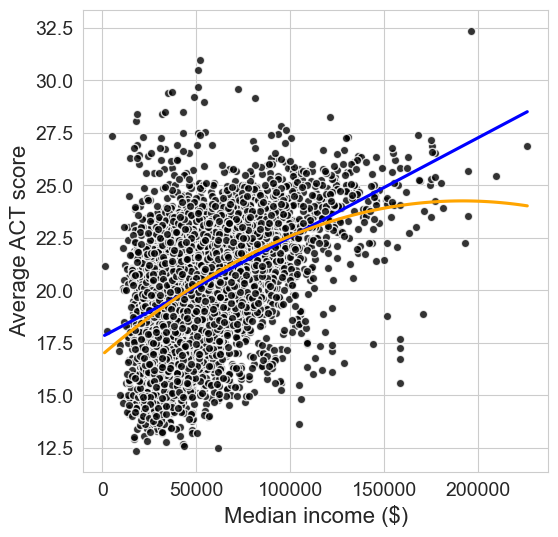

In [58]:
plt.figure(figsize = (6, 6))

# original simple linear regression model
sns.regplot(data = df,
            x = 'median_income',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# order = 2 tells regplot to compute a quadratic regression line
sns.regplot(data = df,
            x = 'median_income',
            y = 'average_act',
            order = 2,
            color = 'orange',
            ci = False,
            scatter = False)

# Add axis labels
plt.xlabel('Median income ($)', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

plt.show()

This shows both regression lines together with the scatter plot.
The quadratic model might provide a slightly better fit, but it is not clear that it is going to be significantly better than the simple linear regression.
We will fit the model and then consider the accuracy and significance of the quadratic model.

###### Fit a quadratic liner regression model.
Now the average ACT score is not only depending on the median income. We've added in a squared version of median income. The I with parentheses is saying that there's a separate term that is the median income squared.

In [59]:
model_median_income2 = smf.ols(
    formula = 'average_act ~ median_income + I(median_income**2)',
    data = df).fit()

###### Display the fit summary.

In [60]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:34:22   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

The R-squared is 0.219. This is very slightly higher than it was for the previous model.
The coefficient on the squared term is statistically significant. It's not clear how much that is improving the model.

###### Assess the model significance

In [61]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

We do have a significant quadratic term as well as a significant linear term.

We can also use an analysis of variance or an ANOVA to compare these two nested plynomial linear regression models. We will compare the simpler model to the more complicated model and ask whether the more complicated model is statistically significant in terms of its difference from the simpler model.

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [63]:
from statsmodels.stats.anova import anova_lm

In [64]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

The p-value is indicating that there is a statistically significant difference because it is so small.
This p-value is exactly the same as the p-value on the coefficient for the squared term, which is just the difference between these two models.

Next we will look at the accuracy of the quadratic model. 
Compute the mean absolute error of the quadratic model.

In [65]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257619853

If we compare this mean absolute error to the mean absolute error of the first order model (1.7129), this is smaller, but not practically smaller.

This means we have the ability to fomulate a model that provides some predictive power of what the ACT score actually is using median income. However, it is a relatively weak prediction. 

A linear model is probably sufficient to predict the ACT score, considering that a quadratic is not necessarily going to provide a much better fit.

#### Percent Free and Reduced Lunch
I actually performed multiple linear regression after the single linear regression for median income. I found in the multiple linear regression that percent free and reduced lunch was the strongest predictor of average ACT score. Now I am going to make a single input model for percent free and reduced lunch.

###### Plot the regression line and the scatter plot

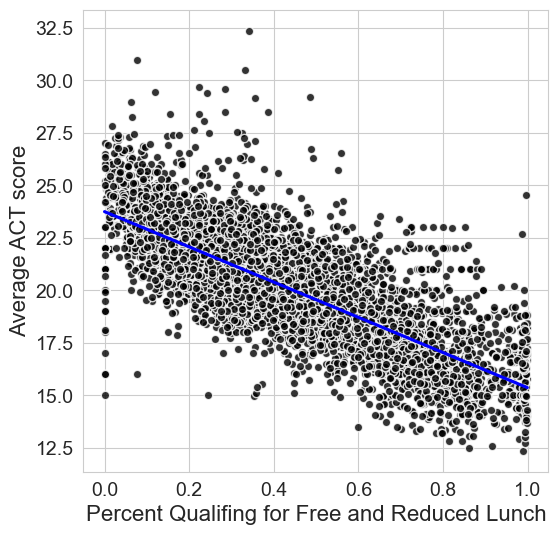

In [67]:
plt.figure(figsize = (6, 6))

sns.regplot(data = df,
            x = 'percent_lunch',
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Percent Qualifing for Free and Reduced Lunch', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize = 14)

plt.show()

This clearly looks like negative linear relationship.

Fit the simple linear regression (using statsmodels ordinary least squares function with the formula version) (predictor variable: percent_lunch, response variable: average_ACT)

In [69]:
#import statsmodels.formula.api as smf
model_percent_lunch = smf.ols(formula = 'average_act ~ percent_lunch', data = df).fit()

Display the fit summary.

In [70]:
print(model_percent_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:13:32   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

We can see the statistical significance of the coefficient in the column for the p-values. They are small, and are in fact 0 up to 3 decimal places, so we have stistically significant coefficients.
We can see some information on the performance of the model. The R-squared value is 0.614, which is not quite as strong as the R-squared for the multiple linear regression of the three predictors percent_lunch, percent_college, and rate_unemployment.

###### Numerical assessment of fit accuracy
Compute the root mean square error (RMSE)

In [71]:
y_hat = model_percent_lunch.predict()

In [72]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(1.559)

In [ ]:
Compute the mean absolute error.

In [74]:
mean_absolute_error(df['average_act'], y_hat)

1.1689939374388325

The mean absolute error tells us what the error was between the regression model and the actual values for the response variable (ACT score). It's saying that we are in some way able to predict the ACT score from this input variable.

###### Use a residual plot for graphical assessment of model fit.

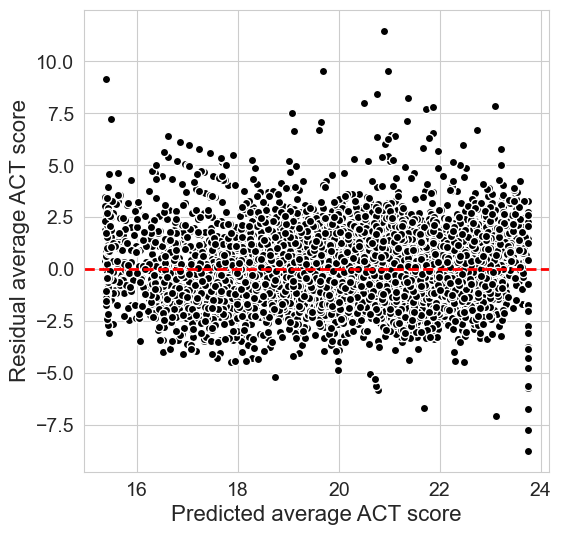

In [75]:
plt.figure(figsize = (6, 6))

plt.plot(y_hat, model_percent_lunch.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

plt.xlabel('Predicted average ACT score', fontsize = 16)
plt.ylabel('Residual average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

When there is no structure to the residual plot (it's just a cloud), that indicates that we're unlikely to improve the model by making tansformations of the input variales that we've used in the model.

A linear model is sufficient to predict the ACT score. 

#### Homeless data

Plot the regression line and the scatter plot.

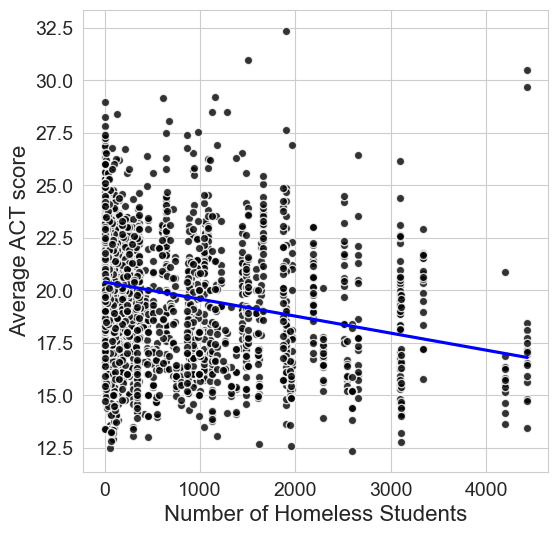

In [76]:
plt.figure(figsize = (6, 6))

sns.regplot(data = df_homeless,
            x = 'homeless_count', 
            y = 'average_act',
            color = 'blue',
            ci = False,
            scatter_kws = {'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

plt.xlabel('Number of Homeless Students', fontsize = 16)
plt.ylabel('Average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

There does not look to be much of a relationship between the number of homeless students and the average ACT score. Let's check the numbers, though.

Fit the simple linear regression (using statsmodels ordinary least squares function with the formula version) (predictor variable: median_income, response variable: average_ACT)

In [77]:
model_homeless = smf.ols(formula = 'average_act ~ homeless_count', data = df_homeless).fit()

Display the fit summary.

In [78]:
print(model_homeless.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     268.2
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           1.56e-58
Time:                        12:49:18   Log-Likelihood:                -10093.
No. Observations:                4313   AIC:                         2.019e+04
Df Residuals:                    4311   BIC:                         2.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.3930      0.043    474.

The p-value is 0 to three decimal places, so we have statistically significant coefficients.
The R-squared is very close to 0, so the model is not a good fit. The homeless count is unlikely to explain much of the variation in the average ACT score.

#### Multiple Linear Regression
Fit the multiple linear regression model using all socioeconomic variables as predictors.
This version uses the five socioeconomic predictor variables from the EdGap dataset in an untransformed manner. (Later we could also include additional transformations of these predictors. We could include other predictor variables, such as whether the school is a charter, or information about the state, or homelessness data.)

In [54]:
model = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
    data = df).fit()

Print the summary.

In [55]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:59:19   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

Two of the model coefficients are not statistically significant, based on their relatively large p-values. (Also interesteing: I forgot to include percent_married when I first did this. Now that I have included percent_married, the median_income p-value has increased from 0.7.) 

The R-squared is much higher than what we had seen with any of our individual predictor models. 

We can use a residual plot for a graphical assessment of the model fit to see if we have used these predictor variables in the best way possible or if there's some transformation we might apply to improve the fit.

###### Use a residual plot for graphical assessment of model fit.

In [ ]:
y_hat = model.predict()

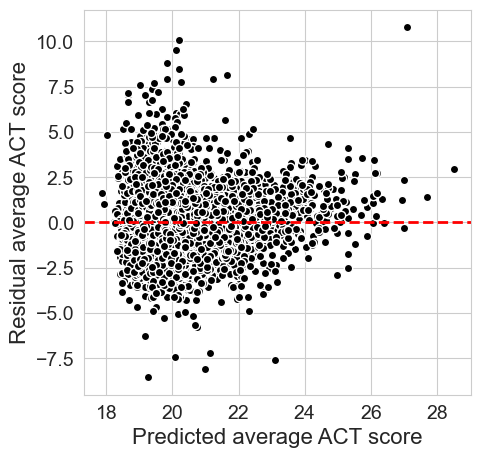

In [58]:
plt.figure(figsize = (5, 5))

plt.plot(y_hat, model.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

plt.xlabel('Predicted average ACT score', fontsize = 16)
plt.ylabel('Residual average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

(I got a different plot than the professor. His was just a cloud. Mine seems to be narrowing as the predicted average ACT score increases.)

When there is no structure to the residual plot (it's just a cloud), that indicates that we're unlikely to improve the model by making tansformations of the input variales that we've used in the model.

We can also do a numerical assessment of the accuracy of the model.

###### Compute the mean absolute error.

In [59]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788844487

This mean absolute error is less than what we were seeing in individual predictor models.

With these predictors, we can estimate the average ACT score to within roughly one point. Not all predictors have significant coefficients, so a subset of those predictors might be sufficient to predict the ACT score. However, adding additional predictors may improve the model performance. 

Since we found that some of the coefficients were not statistically signifcant,
we will fit a reduced model that only includes the predictor variables that have statistically significant coefficients and determine whether that reduced model is sufficient to predict the average ACT score.

###### Fit a reduced model with the significant predictors

In [60]:
model_reduced = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_lunch',
    data = df).fit()

###### Print the summary

In [61]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:07:17   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

All three variables have statistically significant coefficients.

###### Use a residual plot for graphical assessment of model fit

In [ ]:
y_hat = model_reduced.predict()

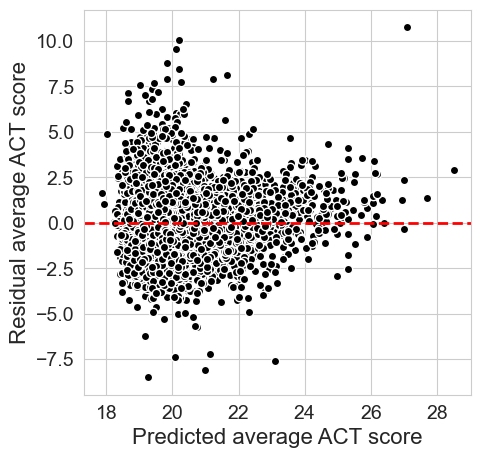

In [63]:
plt.figure(figsize = (5, 5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec = 'w')
plt.axhline(0, color = 'r', linestyle = 'dashed', lw = 2)

plt.xlabel('Predicted average ACT score', fontsize = 16)
plt.ylabel('Residual average ACT score', fontsize = 16)

plt.tick_params(labelsize = 14)

plt.show()

I have a very similar plot to the one that I had with the full model, as does the professor, but his still looks like a cloud. Mine still seems to be narrowing as the predicted average ACT score increases.

Do a numerical assessment of the accuracy:
###### Compute the mean absolute error

In [65]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.145483295034632

This looks very similar to the mean absolute error of the full model.

###### Compare the accuracy between full and reduced models

In [67]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
             'R-squared': [r2_full, r2_reduced]},
             index = ['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1455     0.6279

When we compare the accuracy of the model in terms of the mean absolute error or the R-squared between the reduced model and the full model that included all five predictor variables, they are essentially equivalent.

We can also consider the significance of the difference between the models using an ANOVA and find that there is no statistically significant difference between the reduced model taht just included those three predictor variables and the larger model that had five of the socioeconomic predictor variables.

Adding predictors to the model might improve the performance.

We have not yet determined the relative importance of each predictor in the model.

## Scaling

Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 so that we can use the magnitude of the coefficients in this model to compare the relative importance of each of those predictor variables at contributing to our estimate of the average ACT score.

###### Scale the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame.
######## Define the list of predictor variables

In [68]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

Transform those variables and add those transformed variables to the data frame.

First create a list giving names of these scaled columns where have each one of our variable names.
append '_normalized' so we can distinguish between the original veriables and the normalized value.

In [69]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


Then use the standard scalar from scikit-learn to learn the transformation that we need to apply to give each one of those variables a mean of 0 and a standard deviation of 1. The standard scalar is doing that kind of transformation. (This conversion, where we take an original variable and transform it to have a mean of 0 and a standard deviation of 1 is also called standardization.) 

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler().fit(df[predictor_variables])

We learn our standard scalar and then apply that to the predictor variables to produce these new scaled variables using the transform method.

In [74]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

In [ ]:
###### Check the mean and standard deviation of the transformed data

In [75]:
df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                           0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                      -0.0  
std                        1.0

They do have means near 0 and standard deviations of 1.

Now we can fit the multiple linear regression model with those normalized predictors.
We're using just these three values where we have found in the reduced model for them to have statistically significant coeffieients, but we're using the normalized versions of those predictors.

In [76]:
model_normalized = smf.ols(
    formula = 'average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data = df).fit()

Then we will look at the summary, where we will focus specifically on the coefficients and their magnitude.

In [77]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:03:55   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

We have a much larger magnitude of a coefficient for the percent lunch variable than for either of the other two variables.

(Thinking about how we interpret a coefficient in a multiple linear regression model: That coefficient is saying for a one unit increace in my variable, holding everything else constant, what is the change in the prediction of our response variable? So this says that the estimated change in the average ACT score at a school is of much larger magnitude when we would have a one standard deviation change in the percent lunch variable as compared to the percent college or the unemployment rate variable.)

The R-squared value looks like it is the same as what we had with our reduced model.

Compare the mean absolute error and the R-squared of the normalized model and the reduced model.

In [1]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reducted = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
             index = ['normalized model', 'reduced model']).round(4)

NameError: name 'mean_absolute_error' is not defined

In fact, when we compare all of these numerical measures, the mean absolute error or the R-squared, they are exactly the same between the model with the unscaled predictors and with these scaled predictors.This is because the transformation from our original predictors to their standardized versions does not lead to an overall change in the linear regression model; it's just changing what the coeffieicents in that model are.

The percent of student at a school receiving free or reduced price lunch is the strongest predictor in the model in terms of how much a change in that variable is contributing to an estimated change in the ACT score.

Now that I have gone back and analyzed percent_lunch as a single input model, I have seen that it does not predict average ACT score on its own quite as well as percent_lunch, percent_college, and rate_unemployment predict it together. Therefore, we have found that percent of students qualifying for free or reduced lunch, percent of adults with a college degree, and unemployment rate can predict average ACT score.